In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import sys

sys.path.append("..")

In [3]:
from rdkit import Chem
import rdkit
import itertools
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import ChemicalFeatures
from rdkit.Chem.ChemicalFeatures import MolChemicalFeature
from rdkit import RDConfig
import os


random_seed = 42

In [49]:
from src.draw.mol import show_3d
from src.mol_processing.mol import get_protein_from_pdb_file, remove_water_from_rdkit_mol

receptor = get_protein_from_pdb_file("../data/receptors/2oi0.pdb")

Chem.GetSymmSSSR(receptor)

receptor.GetRingInfo().NumRings()
remove_water_from_rdkit_mol(receptor)

show_3d(receptor)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [5]:
ligand = Chem.SDMolSupplier("../data/ligands/283_model.sdf", sanitize=True, removeHs=False)[0]
ligand = Chem.AddHs(ligand)
ligand.UpdatePropertyCache()
Chem.GetSymmSSSR(ligand)
ligand.GetRingInfo().NumRings()
show_3d(ligand)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [77]:
from src.draw.features import show_molecule_with_features
from src.mol_processing.features import extract_pharmacophores


ligand_features = extract_pharmacophores(ligand, "l")
print(len(ligand_features))
show_molecule_with_features(ligand, ligand_features)

15


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [80]:
from src.draw.features import show_molecule_with_features
from src.graph.interaction_graph import filter_receptor_features_close_to_ligand
from src.mol_processing.features import extract_pharmacophores


receptor_features = extract_pharmacophores(receptor, "R")
print(len(receptor_features))


1360


In [83]:
_, R_features = filter_receptor_features_close_to_ligand(ligand_features, R_features=receptor_features, max_distance=6.5)
show_molecule_with_features(receptor, R_features)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [33]:
print(len(R_features))

31


In [84]:
from src.draw.features import visualize_docking_site


visualize_docking_site(ligand, receptor, ligand_features, list(R_features))

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [113]:
from src.mol_processing.features import load_features_from_pma_file
from src.mol_processing.surface import select_surface_features, visualize_selection

_, docking_site_features = filter_receptor_features_close_to_ligand(
    ligand_features, R_features=receptor_features, max_distance=6.5
)

receptor_features = select_surface_features(receptor, docking_site_features, ligand=ligand)

print("Points total:", len(docking_site_features))
print("Points near surface:", len(receptor_features))
visualize_selection(receptor, docking_site_features, receptor_features, ligand=ligand)

Probe radius calculated from ligand: 2.00 Å
Points total: 40
Points near surface: 36


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [114]:
from src.graph.interaction_graph import build_distance_matrix
from src.mol_processing.features import find_pharmacophore_distances

from src.draw.mol import visualize_flexibility_ensemble

ligand_min_max_distances = find_pharmacophore_distances(ligand, ligand_features)
receptor_distance_matrix = build_distance_matrix(receptor_features)

flex_view = visualize_flexibility_ensemble(ligand, num_to_display=150)
flex_view

Plotting 150 of 151 aligned conformers.


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [115]:
from src.draw.mol import visualize_min_max_distance_pair


visualize_min_max_distance_pair(ligand, ligand_min_max_distances)

Pair with largest variation: (l_d_0, l_h_4)
  Min distance: 4.91 Å (Conformer ID: 20)
  Max distance: 13.74 Å (Conformer ID: 114)


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

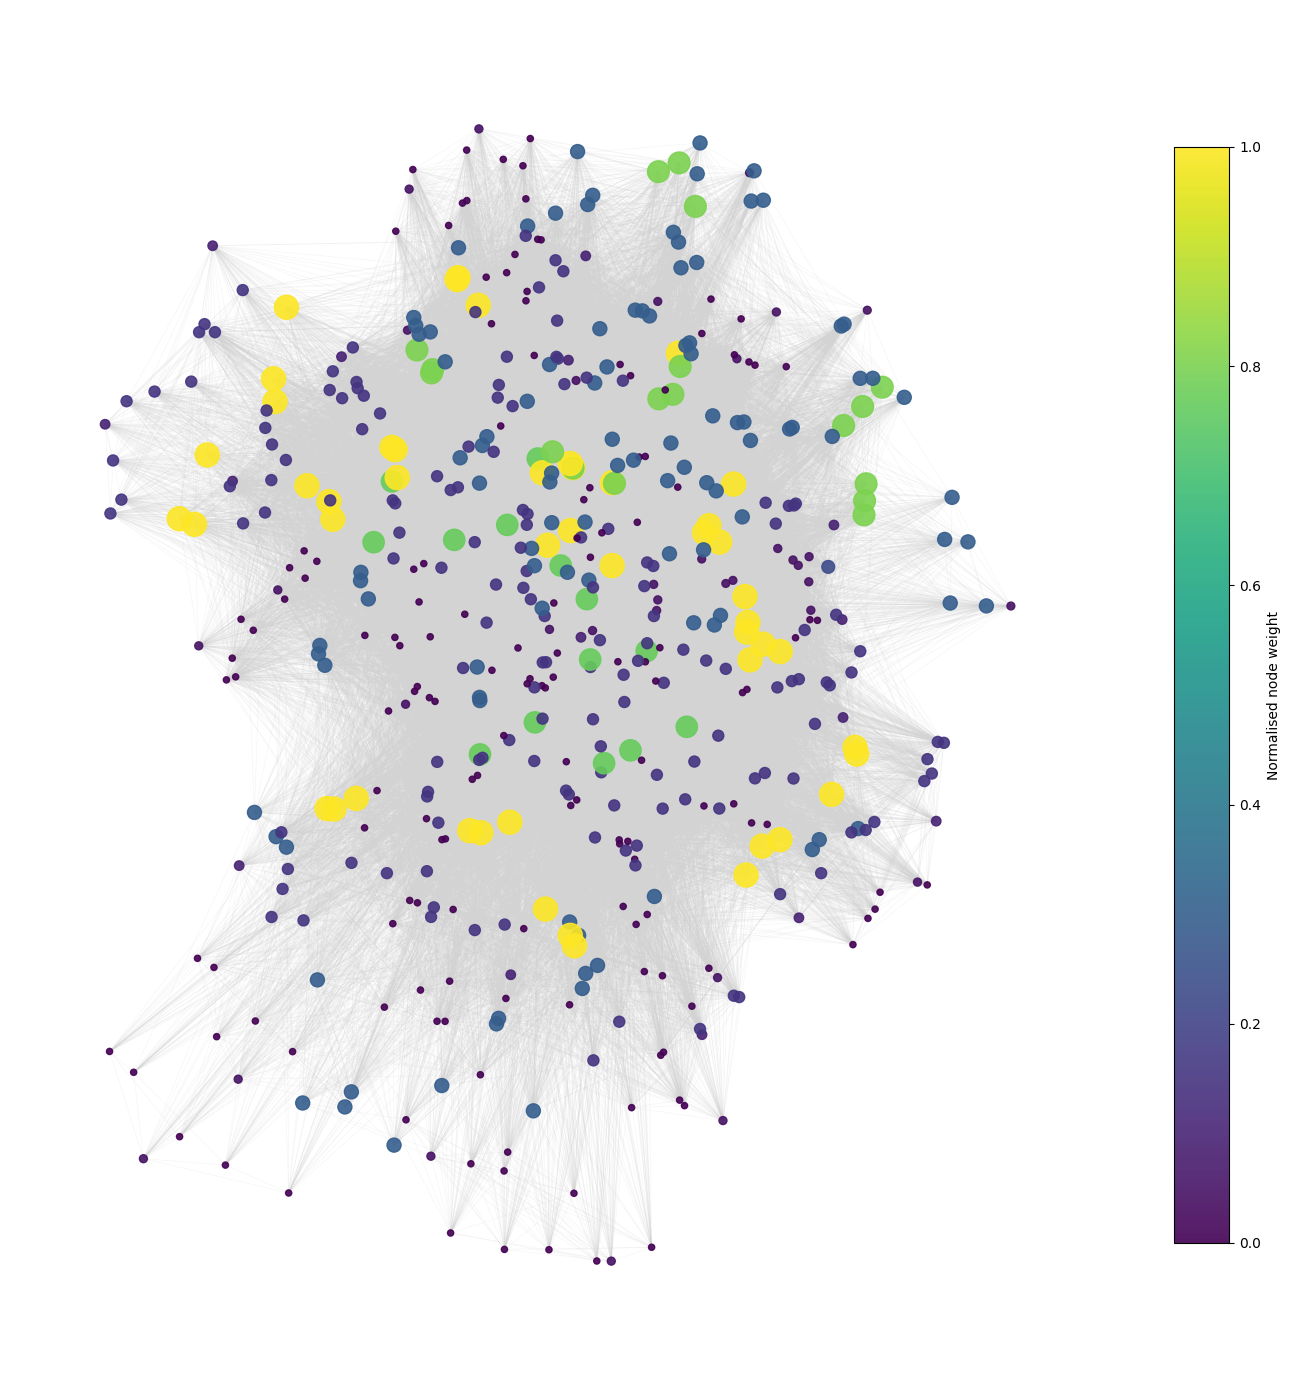

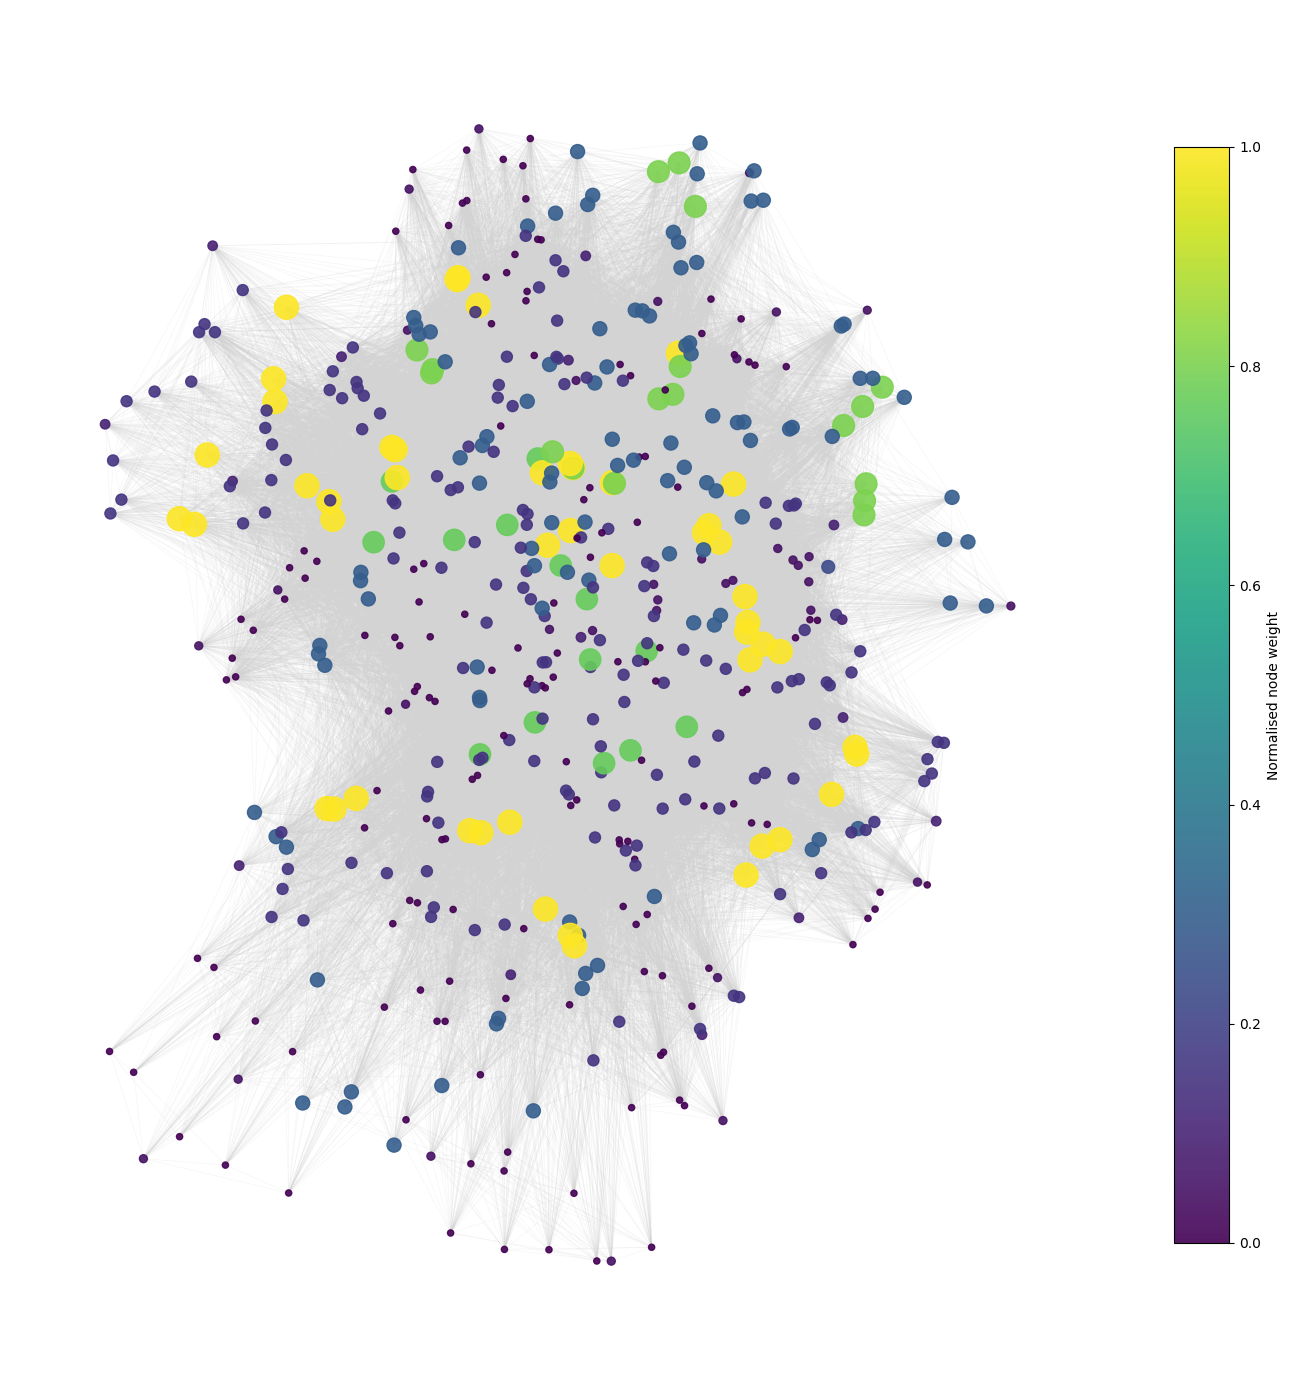

In [122]:
from src.draw.graph import plot_weighted_graph
from src.graph.interaction_graph import build_weighted_binding_interaction_graph


interaction_graph = build_weighted_binding_interaction_graph(
    ligand_features, receptor_features, ligand_min_max_distances, receptor_distance_matrix
)
plot_weighted_graph(interaction_graph)

In [121]:
print(interaction_graph.number_of_edges())
print(interaction_graph.number_of_nodes())
print(
    interaction_graph.number_of_edges()
    / (interaction_graph.number_of_nodes()
    * (interaction_graph.number_of_nodes() - 1))
)

43000
540
0.14773586202157632


In [124]:
from src.solver.classical import greedy_max_weight_clique


clique = greedy_max_weight_clique(interaction_graph)

clique

['l_h_8-R_d_221',
 'l_d_0-R_a_298',
 'l_a_2-R_d_224',
 'l_a_0-R_d_222',
 'l_a_1-R_a_297',
 'l_d_0-R_d_316',
 'l_h_6-R_a_298',
 'l_h_1-R_a_213',
 'l_h_5-R_a_213',
 'l_h_3-R_d_223',
 'l_h_6-R_d_316',
 'l_h_2-R_d_223',
 'l_h_9-R_d_220',
 'l_h_4-R_d_221',
 'l_ar_0-R_d_223',
 'l_h_7-R_h_295']